<a href="https://colab.research.google.com/github/taejoonlab/TKlab-toolbox/blob/master/ColabNotebook/CalciumInEntosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 업로드
* 현미경에서 나온 파일들을 업로드 합니다 (여러 개의 파일 선택 가능).
* 파일 양식은 tab 으로 구분된 텍스트 파일이고, 총 7개의 컬럼을 가지고 있습니다.
 * 시간 - GFP Loser - GFP Winner  - GFP background - RFP Loser - RFP Winner - RFP background 
 * MS Excel 에서 'Text (Tab delimited)' 로 저장하면 됩니다.
 * 각 cell 의 실행은 cell 을 선택하면 나타나는 왼쪽 "play" 버튼을 누르면 됩니다.

In [3]:
## 이미 있는 .txt 파일들을 지웁니다.
!rm *.txt

## 파일 업로드
from google.colab import files
uploaded = files.upload()

rm: cannot remove '*.txt': No such file or directory


Saving 20190525_E02.txt to 20190525_E02.txt
Saving 20190525_E10.txt to 20190525_E10.txt
Saving 20190525_E09.txt to 20190525_E09.txt
Saving 20190525_E08.txt to 20190525_E08.txt
Saving 20190525_E07.txt to 20190525_E07.txt
Saving 20190525_E06.txt to 20190525_E06.txt
Saving 20190525_E05.txt to 20190525_E05.txt
Saving 20190525_E03.txt to 20190525_E03.txt
Saving 20190525_E04.txt to 20190525_E04.txt
Saving 20190525_E01.txt to 20190525_E01.txt


# 데이터 읽기
* 아래 cell 을 실행해서 데이터를 읽습니다.
 * 파일 이름에서 점(.)으로 구분했을 때 앞부분이 'data_name' 으로 저장됩니다.
 * <실험날짜>_<E###>.txt 형식으로 파일 이름을 저장하면 좋을 것 같습니다.
 * 이 경우 특정실험 날짜의 데이터만 분석하고 싶다면 prefix_filename 부분과 밑의 주석처리된 부분을 활용할 수 있습니다. 

In [4]:
import os
import pandas as pd

# prefix_filename 을 사용하려면 아래 # 표시를 삭제하세요.
#prefix_filename = '20190525_'

col_names = ['Time','CaWin', 'CaLose', 'CaBg', 'ProtWin', 'ProtLose', 'ProtBg']

pair_list = dict()

for tmp_filename in os.listdir('.'):
  # prefix_filename 을 사용하려면 아래 # 표시를 삭제하세요.
  #if not tmp_filename.startswith(prefix_filename):
  #  continue
  
  if not tmp_filename.endswith('.txt'):
    continue
  
  tmp_sample = tmp_filename.split('.')[0]
  tmp_pair = pd.read_csv(tmp_filename, names=col_names, sep='\t')
  pair_list[tmp_sample] = tmp_pair
  
  # Background correction
  pair_list[tmp_sample]['Time'] = tmp_pair['Time'] *3600
  pair_list[tmp_sample]['CaWinNet'] = tmp_pair['CaWin'] - tmp_pair['CaBg']
  pair_list[tmp_sample]['CaLoseNet'] = tmp_pair['CaLose'] - tmp_pair['CaBg']
  pair_list[tmp_sample]['ProtWinNet'] = tmp_pair['ProtWin'] - tmp_pair['ProtBg']
  pair_list[tmp_sample]['ProtLoseNet'] = tmp_pair['ProtLose'] - tmp_pair['ProtBg']

  # Normalization by Protein Abundance
  pair_list[tmp_sample]['CaWinNorm'] = tmp_pair['CaWinNet'] / tmp_pair['ProtWinNet']
  pair_list[tmp_sample]['CaLoseNorm'] = tmp_pair['CaLoseNet'] / tmp_pair['ProtLoseNet']
    
  print("Read %s as %s" % (tmp_filename, tmp_sample))

Read 20190525_E09.txt as 20190525_E09
Read 20190525_E10.txt as 20190525_E10
Read 20190525_E03.txt as 20190525_E03
Read 20190525_E01.txt as 20190525_E01
Read 20190525_E08.txt as 20190525_E08
Read 20190525_E07.txt as 20190525_E07
Read 20190525_E04.txt as 20190525_E04
Read 20190525_E05.txt as 20190525_E05
Read 20190525_E02.txt as 20190525_E02
Read 20190525_E06.txt as 20190525_E06


# 데이터 확인 (선택사항)

* 아래 cell 에서 'data_name'을 변경해서 데이터를 확인합니다.
 * Top panel: Normalized signal = (Calcium Singal) / (Protein Abundance)
 * Middle panel: Background corrected Calcium Signal
 * Bottom panel: Background corrected Protein Abundance

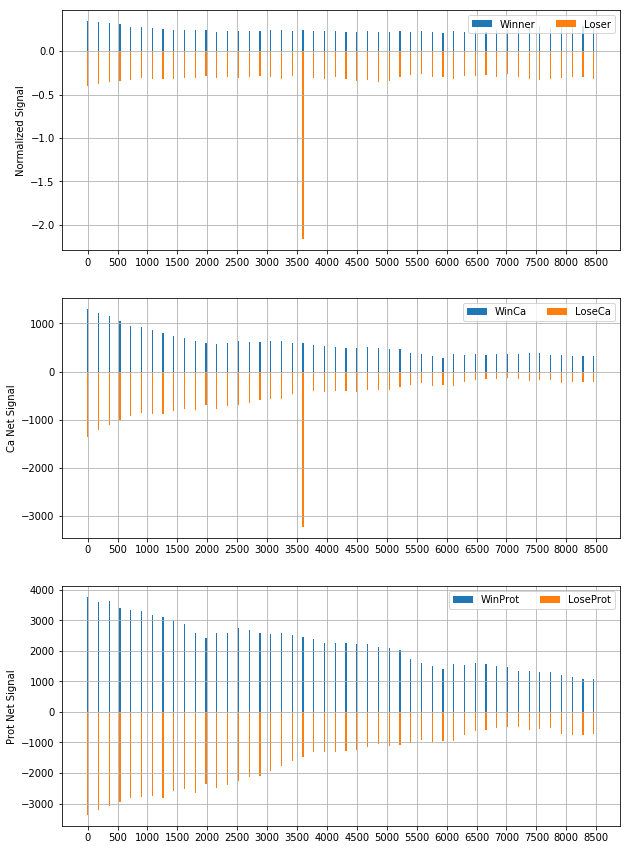

In [5]:
data_name = '20190525_E08'
import matplotlib.pyplot as plt

data_pair = pair_list[data_name]
time_tick_list = range(0,int(max(data_pair['Time']))+100,500) 

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.bar(data_pair['Time'], data_pair['CaWinNorm'], width=20, label='Winner')
ax1.bar(data_pair['Time'], data_pair['CaLoseNorm']*-1, width=20, label='Loser')
ax1.set_ylabel('Normalized Signal')
ax1.set_xticks(time_tick_list)
ax1.grid()
ax1.legend(loc='upper right', ncol=2)

ax2 = fig.add_subplot(3,1,2)
ax2.bar(data_pair['Time'], data_pair['CaWinNet'], width=20, label='WinCa')
ax2.bar(data_pair['Time'], data_pair['CaLoseNet']*-1, width=20, label='LoseCa')
ax2.set_ylabel('Ca Net Signal')
ax2.set_xticks(time_tick_list)
ax2.grid()
ax2.legend(loc='upper right', ncol=2)

ax3 = fig.add_subplot(3,1,3)
ax3.bar(data_pair['Time'], data_pair['ProtWinNet'], width=20, label='WinProt')
ax3.bar(data_pair['Time'], data_pair['ProtLoseNet']*-1, width=20, label='LoseProt')
ax3.set_ylabel('Prot Net Signal')
ax3.set_xticks(time_tick_list)
ax3.grid()
ax3.legend(loc='upper right', ncol=2)


plt.show()

# Normalized Signal Distribution 확인 (선택사항)
* 전체 normalized peak signal 의 분포 확인.

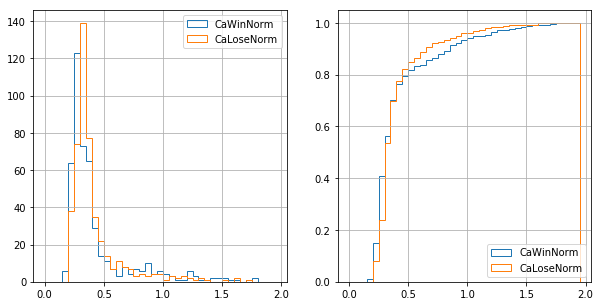

In [55]:
win_signal_list = []
lose_signal_list = []
for tmp_data_name in pair_list.keys():
  data_pair = pair_list[tmp_data_name]
  win_signal_list += list(data_pair['CaWinNorm'])
  lose_signal_list += list(data_pair['CaLoseNorm'])
  
import matplotlib.pyplot as plt

bin_list = [x*0.05 for x in range(0,40)]
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.hist(win_signal_list, histtype='step', bins=bin_list, label='CaWinNorm')
ax1.hist(lose_signal_list, histtype='step', bins=bin_list, label='CaLoseNorm')
ax1.grid()
ax1.legend(loc='upper right', ncol=1)

ax2 = fig.add_subplot(1,2,2)
ax2.hist(win_signal_list, histtype='step', bins=bin_list, label='CaWinNorm', cumulative=True, density=True)
ax2.hist(lose_signal_list, histtype='step', bins=bin_list, label='CaLoseNorm', cumulative=True, density=True)
ax2.grid()
ax2.legend(loc='lower right', ncol=1)

plt.show()

# 전체 데이터 분석
* 아직 clustering 이나 similarity 계산 부분은 들어가 있지 않습니다.
* Winner 및 Loser 에서 peak 이 발생하는 경우, 동시에 발생하는 경우를 한 줄에 다른 색깔로 표시.
* peak_cutoff 를 임의로 전함 (추후 개선?)

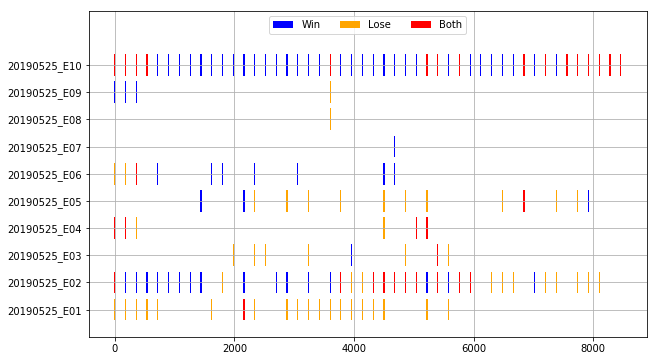

In [52]:
# 0.5 이상을 signal 로 판단.
peak_cutoff = 0.5
y_step = 1.0

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)

y_idx = 1
y_idx_list = []
y_label_list = []
for tmp_data_name in sorted(pair_list.keys()):
  data_pair = pair_list[tmp_data_name]
  
  x_win_list = []
  x_lose_list = []
  x_overlap_list = []
  
  y_win_list  = []
  y_lose_list = []
  y_overlap_list = []
  
  tmp_idx = 0
  for tmp_time in data_pair['Time']:
    if data_pair['CaWinNorm'][tmp_idx] > peak_cutoff:
      x_win_list.append(tmp_time)
      y_win_list.append(y_idx)
      if data_pair['CaLoseNorm'][tmp_idx] > peak_cutoff:
        x_overlap_list.append(tmp_time)
        y_overlap_list.append(y_idx)
    elif data_pair['CaLoseNorm'][tmp_idx] > peak_cutoff:
      x_lose_list.append(tmp_time)
      y_lose_list.append(y_idx)
    tmp_idx += 1
  
  if y_idx == 1:
    ax1.bar(x_win_list, [0.8 for tmp in y_win_list], bottom=[tmp-0.4 for tmp in y_win_list], width=20, color='blue', label='Win')
    ax1.bar(x_lose_list, [0.8 for tmp in y_lose_list], bottom=[tmp-0.4 for tmp in y_lose_list], width=20, color='orange', label='Lose')
    ax1.bar(x_overlap_list, [0.8 for tmp in y_overlap_list], bottom=[tmp-0.4 for tmp in y_overlap_list], width=20, color='red', label='Both')

  else:
    ax1.bar(x_win_list, [0.8 for tmp in y_win_list], bottom=[tmp-0.4 for tmp in y_win_list], width=20, color='blue')
    ax1.bar(x_lose_list, [0.8 for tmp in y_lose_list], bottom=[tmp-0.4 for tmp in y_lose_list], width=20, color='orange')
    ax1.bar(x_overlap_list, [0.8 for tmp in y_overlap_list], bottom=[tmp-0.4 for tmp in y_overlap_list], width=20, color='red')
    
  y_idx_list.append(y_idx)
  y_label_list.append(tmp_data_name)
  y_idx += 1
  
ax1.set_yticks(y_idx_list)
ax1.set_yticklabels(y_label_list)
ax1.set_ylim(min(y_idx_list)-1, max(y_idx_list)+2)
ax1.grid()
ax1.legend(loc='upper center', ncol=3)
plt.show()